<a href="https://colab.research.google.com/github/qotic/dataset/blob/main/knn_soal4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Supervised Learning: Klasifikasi K-Nearest Neighbors**
Pertama, kita load dulu berbagai library yang diperlukan:

Numpy
Matplotlib untuk membuat grafik
Pandas
SKlearn
Itertools

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

Dataset
Unduh dari kumpulan dataset di laman https://raw.githubusercontent.com/qotic/dataset/main/soalregganda4.csv

In [2]:
!wget -O soalregganda4.csv https://raw.githubusercontent.com/qotic/dataset/main/soalregganda4.csv

--2022-04-21 06:47:58--  https://raw.githubusercontent.com/qotic/dataset/main/soalregganda4.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1092 (1.1K) [text/plain]
Saving to: ‘soalregganda4.csv’

soalregganda4.csv   100%[===================>]   1.07K  --.-KB/s    in 0s      

2022-04-21 06:47:58 (58.9 MB/s) - ‘soalregganda4.csv’ saved [1092/1092]



**Load Dataset**

In [3]:
df = pd.read_csv('soalregganda4.csv')
df.head()

,N,Y,X1,X2,X3,X4
0,1,80250,1650000,10,1,80250
1,2,86000,1600000,8,1,86000
2,3,106000,2050000,8,1,106000
3,4,70108,1200000,7,1,70108
4,5,680400,1650000,4,2,170100


**Visualisasi dan Analisis Data**

Coba kita tampilkan jumlah data per label

In [5]:
df['Y'].value_counts()

79000      2
66100      2
80250      1
81000      1
75100      1
70000      1
68000      1
66500      1
215850     1
69700      1
182100     1
105500     1
60710      1
72000      1
61000      1
120000     1
490000     1
427260     1
510000     1
86000      1
324000     1
106000     1
70108      1
680400     1
111000     1
55500      1
72500      1
300000     1
405000     1
229500     1
1600000    1
780000     1
423000     1
210000     1
125000     1
335000     1
Name: Y, dtype: int64


Kita juga dapat menampilkan histogram dari data, misalnya kolom Y, X1, X2, X3 dan X4:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f648ba8fdd0>]],
      dtype=object)

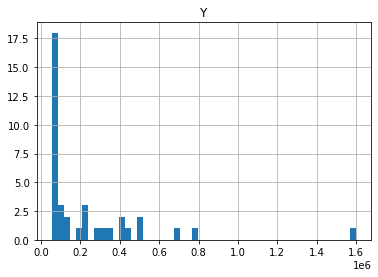

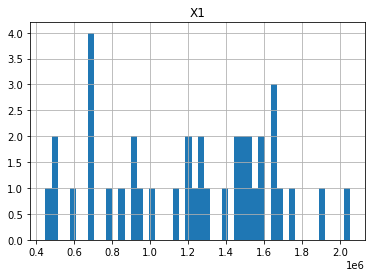

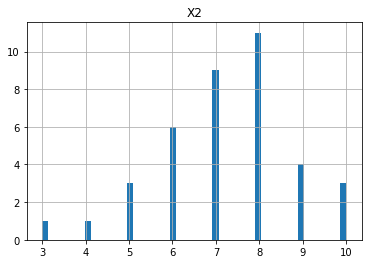

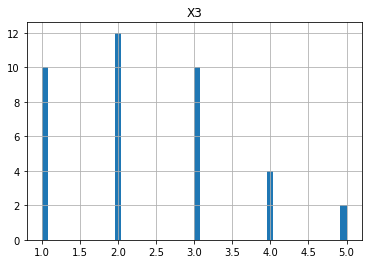

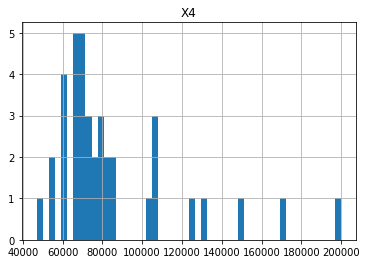

In [8]:
df.hist(column='Y', bins=50)
df.hist(column='X1', bins=50)
df.hist(column='X2', bins=50)
df.hist(column='X3', bins=50)
df.hist(column='X4', bins=50)

**Feature set**

Selanjutnya, kita format dataset, yaitu bentuk feature sets (kumpulan atribut), kita bentuk variabel X:

In [9]:
df.columns

Index(['N', 'Y', 'X1', 'X2', 'X3', 'X4'], dtype='object')

Untuk menggunakan library scikit-learn library, kita harus convert format data frame-nya Panda, ke array Numpy :

In [10]:
X = df[['Y','X1','X2','X3','X4']].values  #.astype(float)
X[0:5]

array([[  80250, 1650000,      10,       1,   80250],
       [  86000, 1600000,       8,       1,   86000],
       [ 106000, 2050000,       8,       1,  106000],
       [  70108, 1200000,       7,       1,   70108],
       [ 680400, 1650000,       4,       2,  170100]])

Definisikan Labelnya juga (Y):

In [11]:
y = df['Y'].values
y[0:5]

array([ 80250,  86000, 106000,  70108, 680400])

**Normalisasi Data**

K-NN merupakan metode yang didasarkan pada tingkat kedekatan antar-atribut. Oleh karena itu, sangat disarankan untuk melakukan normalisasi data agar perhitungan jarak menjadi lebih valid.

In [12]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.53703758,  1.02189081,  1.74878599, -1.2070197 , -0.14293223],
       [-0.51717819,  0.90398988,  0.48299803, -1.2070197 ,  0.03602176],
       [-0.44810207,  1.96509826,  0.48299803, -1.2070197 ,  0.65847042],
       [-0.57206608, -0.03921757, -0.14989594, -1.2070197 , -0.45857595],
       [ 1.53576414,  1.02189081, -2.04857787, -0.32496684,  2.65341839]])

**Pembagian Data Training dan Testing**

Untuk menghasilkan model yang baik, perlu dilakukan pengujian yang baik. Aturan umum yang berlaku adalah data training dan testing harus dipisahkan terlebih dahulu. Dengan kata lain tidak boleh menggunakan data yang sama untuk training dan testing.

Untuk mempermudah, komposisi yang digunakan sebesar 80% data training dan 20% data testing.

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=10)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (34, 5) (34,)
Test set: (4, 5) (4,)


Klasifikasi
K nearest neighbor (K-NN)
Import library 
Import classifier K-Nearest Neighbors

In [29]:
from sklearn.neighbors import KNeighborsClassifier

**Training**

Pertama, tentukan nilai k. Kita akan coba dengan nikai k=5:

In [35]:
k = 5
#Train Model and Predict  
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
knn

KNeighborsClassifier()

**Predicting**

Kita sudah dapat menggunakan model yang terbentuk untuk memprediksikan data

In [36]:
yhat = knn.predict(X_test)
yhat[0:5]

array([ 66100,  55500,  72500, 210000])

**Perhitungan Akurasi**

Pada klasifikasi multi-kelas, nilai akurasi klasifikasi secara sederhana dapat dihitung dengan memperbandingkan kelas hasil prediksi algoritma dengan kelas sebenarnya / actual class.

In [37]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.08823529411764706
Test set Accuracy:  0.0


**Mencari Nilai K Terbaik**
Performa dari model KNN sangat bergantung dengan nilai K. Lalu bagaimana memilih nilai K yang terbaik? Jawabnya, kita harus lakukan pengujian.

Kode berikut ini bertujuan untuk melakukan pengujian nilai k dari k=1 s.d k=10.

In [38]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

Lalu kita juga bisa menampilkan grafik / plot-nya

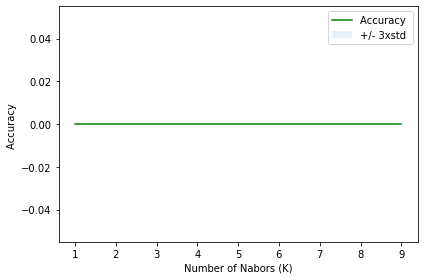

In [39]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()